1. read in the fashion dataset
2. read (maybe make notes?)about PCA
3. implement 2.1.1

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

from tensorflow.keras.datasets import fashion_mnist

### 2.1.1 PCA
#### Run PCA on the fashion-MNIST dataset.
1. How much variance do the first and second principal components explain? (5 marks)
2. Create a 2D scatterplot of the data projected onto the first two principal components. Differentiate between the different classes using colour. To what extent do the datapoints in your scatter plot cluster into the different classes? (5 marks)

#### PCA implementation
PCA consists of two main steps:
1. Find a new set of basis vectors, named the principal components, according to how much of the variance within the dataset each of these components are able to capture. The first principal component corresponds to the one which captures the most variance, the second principal component corresponds to the second most variance and so on.
2. Select the first $n$ principal components and project the original data to this new basis.

In particular, the principal components correspond to the eigenvectors of the covariance matrix of the data. The corresponding eigenvalues capture the amount of variance in that direction.

How much variance do the first and second principal components explain? 

In [35]:
mnist = fetch_openml(name='Fashion-MNIST')
X = np.array(mnist.data)

In [37]:
pca = PCA(n_components=2)
pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.2905654  0.17738509]


Create a 2D scatterplot of the data projected onto the first two principal components. Differentiate between the different classes using colour. To what extent do the datapoints in your scatter plot cluster into the different classes?

['9' '0' '0' ... '8' '1' '5']
original shape:    (70000, 784)
transformed shape: (70000, 2)


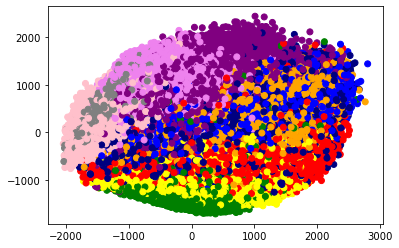

In [83]:
#I don't think this works? Like idk if the plot is correct, the plot of the og data doesn't seem to spread accros
#the axes at all, so I'm worried I'm not picking the right eigenvectors/dimensions
#do they mean the classes by the provided labels? Or am I supposed to cluster the data into new classes?
#I think it's the first one, assigned colours to labels
labels = np.array(mnist.target)
print(labels)
colors = {'0':'red', '1':'green', '2':'blue', '3':'yellow', '4':'orange', '5':'pink', '6':'navy', '7':'grey', '8':'purple', '9':'violet'}
colored_labels = np.array([colors[xi] for xi in labels])
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
plt.scatter(X[:, 0], X[:, 1], c = 'red', alpha=1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = colored_labels, alpha=1)
plt.axis('auto');


Same plot but with different transparency for better visibility.

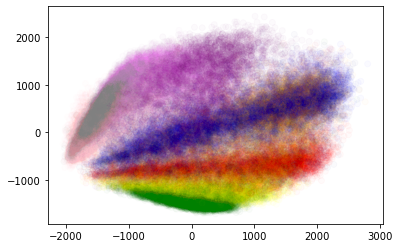

In [84]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = colored_labels, alpha=0.02)
plt.axis('auto');